## Rare v.s. Common words

As mentioned in the *question* section of the README.md, I think how often the author uses rare words in the fanfic demonstrate the writing styles and could be a differentiation factor. Thus, here is a exploration done on the rare words frequency. 

In [1]:
from dataloader import *

Data from "data/ao3.p" loaded. Document Size: 31034. System Memory: 1222.04mb


In [2]:
import pandas as pd
import pickle
import numpy as np
from collections import Counter, defaultdict
from itertools import chain
import re
from sys import getsizeof
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from tqdm.notebook import trange, tqdm

In [3]:
print_fanfic(0, True, 500)


[0]('30843428', 'nervous by nature and overthinking everything') Teen And Up Audiences
['Minecraft (Video Game)', 'Dream SMP - Fandom', 'Video Blogging RPF']
https://archiveofourown.org/works/30843428
['Angst', 'Angst with a Happy Ending', 'Kinda', 'Arguing', 'Fighting', 'Traumatized TommyInnit (Video Blogging RPF)', 'Resurrected TommyInnit (Video Blogging RPF)', 'Protective TommyInnit (Video Blogging RPF)', 'Ranboo Has Anxiety Disorder (Video Blogging RPF)', 'Ranboo & TommyInnit Friendship (Video Blogging RPF)', 'Ranboo Has a Tail (Video Blogging RPF)', 'Sad Ranboo (Video Blogging RPF)', 'Nonbinary Ranboo (Video Blogging RPF)', 'Mentioned Toby Smith | Tubbo', 'Platonically Married Ranboo and Toby Smith | Tubbo', 'All Platonic - Freeform', 'you fuckers', 'Unhealthy Coping Mechanisms', 'Canon Compliant']


It was calm, that night in the tower. The kind of calm that came after a day of uneventful happenings, a feeling of peace that grew the longer into the evening it went. On the SMP, d

we only care about the proper English words in the dictionary

In [4]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import words

en_vocab = set(words.words())
print(len(en_vocab))

235892


TF-IDF to get tokens in the corpus

In [5]:
vectorizer = TfidfVectorizer(
    min_df=10,
    stop_words='english'
)
T = vectorizer.fit_transform(corpus)

In [6]:
f'Corpus has {T.shape[0]} documents with a vocab size of {T.shape[1]}'

'Corpus has 31034 documents with a vocab size of 44563'

In [7]:
doc_terms = vectorizer.inverse_transform(T)

In [8]:
word_to_ix = vectorizer.vocabulary_
ix_to_word = {i : w for w, i in word_to_ix.items()}

Some rare words rannking based on their idf score

In [9]:
# rare word ranking
for i in np.argsort(-vectorizer.idf_)[:100]:
    if ix_to_word[i] in en_vocab:
        print(ix_to_word[i], vectorizer.idf_[i])

treble 8.944975606049383
overruling 8.944975606049383
overrule 8.944975606049383
jubilance 8.944975606049383
catcall 8.944975606049383
possum 8.944975606049383
blunter 8.944975606049383
fronting 8.944975606049383
witchery 8.944975606049383
unworldly 8.944975606049383
frigidly 8.944975606049383
frostily 8.944975606049383
funerary 8.944975606049383
suitability 8.944975606049383
fulling 8.944975606049383
sullenness 8.944975606049383
hitchhiker 8.944975606049383
leggy 8.944975606049383
blueness 8.944975606049383
modulate 8.944975606049383
allegro 8.944975606049383
devotee 8.944975606049383
cordy 8.944975606049383
citric 8.944975606049383
prawn 8.944975606049383
augment 8.944975606049383
precipitated 8.944975606049383
dib 8.944975606049383
overfill 8.944975606049383
leprechaun 8.944975606049383
frenziedly 8.944975606049383
attune 8.944975606049383


import wordfreq library to get common frequencies of English words. general method is averaging the frequency of each unique word in a document to get average frequency of this document

In [10]:
from wordfreq import zipf_frequency

doc_freq = {}
for i, doc in enumerate(tqdm(doc_terms[:])):
    freq, total_count = 0, 0
    for term in doc:
        if term in en_vocab:
            freq += zipf_frequency(term, 'en')
            total_count += 1
    doc_freq[i] = freq / (total_count + 1e-10)

  0%|          | 0/31034 [00:00<?, ?it/s]

In [11]:
def custom_corpus_freq(fn):
    text = open(fn, 'r+', encoding='utf-8').read()
    u = vectorizer.transform([text])
    u_terms = vectorizer.inverse_transform(u)[0]
    
    total_count, freq = 0, 0
    for term in u_terms:
        if term in en_vocab:
            total_count += 1
            freq += zipf_frequency(term, 'en')
    return freq / total_count

rarity rank of documents (top results are not in English but are accidentally tagged as English)

In [18]:
print('Rare documents:')
for doc_id, freq in sorted(doc_freq.items(), key=lambda x:x[1])[:10]:
    print(doc_id, freq)

print('\nCommon documents:')
for doc_id, freq in sorted(doc_freq.items(), key=lambda x:-x[1])[:10]:
    print(doc_id, freq)


print('\nAs some points of comparsion...')
for name, fn in [
    ('Ulysses', 'text/ulysses.txt'),
    ('Moby Dick', 'text/moby dick.txt'),
    ('Emma', 'text/emma.txt'),
    ('Les Misérables', 'text/les mis.txt'),
    ('Keeping Up With the Kardashians', 'text/kardashians.txt'),
    ]:
    print(f"Average word freq for \"{name}\" is {custom_corpus_freq(fn)}")

Rare documents:
4761 0.0
11937 0.0
15363 0.0
20284 3.8099999998095
9616 3.9370798898066197
1627 3.9442502585311314
26457 3.973208888888537
19245 3.9959272359775633
21417 4.000961538453845
4422 4.0036585365756

Common documents:
19962 5.261739130411906
30367 5.243831775696035
4396 5.224285714273274
27337 5.222727272717776
29285 5.221304347818521
8620 5.208235294109988
284 5.171666666658047
4430 5.14901408449979
4429 5.144593023252824
16842 5.138163265295636

As some points of comparsion...
Average word freq for "Ulysses" is 4.067898550724634
Average word freq for "Moby Dick" is 4.200581140350868
Average word freq for "Emma" is 4.303748071979432
Average word freq for "Les Misérables" is 4.344717978848406
Average word freq for "Keeping Up With the Kardashians" is 4.754082232011752


Some examaples of fanfics with rare words

In [20]:
print_fanfic(9616, True, 1000)
print_fanfic(1627, True, 1000)
print_fanfic(26457, True, 1000)


[9616]('30469629', 'Cozy Morning') Explicit
['Drawn Together (Cartoon)']
https://archiveofourown.org/works/30469629
['Xandir x Reader', 'Xandir P. Wifflebottom x Reader', 'Romance', 'Alternate Universe', 'Canon Divergent Sexuality', "Don't Like Don't Read", 'uh oh spicy tag time', 'Smut', 'Fluff and Smut', 'Morning Kisses', 'Morning Cuddles', 'Morning Sex', 'Vaginal Fingering', 'Vaginal Sex', 'Woman on Top', 'end of spicy tags', "once again don't like don't read", 'this is for the xandir fangirls']

⋆┈┈｡ﾟ❃ུ۪ ❀ུ۪ ❁ུ۪ ❃ུ۪ ❀ུ۪ ﾟ｡┈┈⋆You wake to sugar-laced sweet nothings in your ear, an arm wrapped ‘round your waist, protective. A wall of warmth presses to your back, cocoons you, reigniting those ecstatic embers you’d thought were long extinguished. Like petals of a sleepy poppy, your eyelids droop as you slip under the tide of a tranquil dream—that is, until his lips brush tender against your nape, sending electric shivers through your unclad body. Fire flushes your face. You tense, a sp

some examples of fanfics with common words

In [23]:
print_fanfic(8620, True, 1000)
print_fanfic(30367, True, 1000)
print_fanfic(29285, True, 1000)


[8620]('29770200', 'Wonderland Monologues') Mature
['Durarara!!']
https://archiveofourown.org/works/29770200
['monologues', 'Jail', 'thoughts', 'Familiars', 'Apocalypse game', 'Worry', 'Misery']


Chapter Text
Wonderland MonologuesWalkerI have been in jail for… Oh, I don't know anymore. I have been here for a while now. To be honest with you, I am not really worried about it. I have seen people come in and out of here. Some of them tough and some of them look so scared to be here. I just sit in my cell and watch. What else can I do? They took my phone. There's no manga or anime here either.Erika always comes by to see me once a week. I know that she is worried about me. She wants to help me escape. I can't do that. Not yet anyway. I can't explain it. But I feel like I have to stay. Maybe I'm waiting for something. Or someone?"Hm?" I looked out of the cell door. There's someone coming. Hm… She looks about my age. This lady has her eyes to her feet. She looks like she has been crying. W

some basic stats giving an overview of the distribution

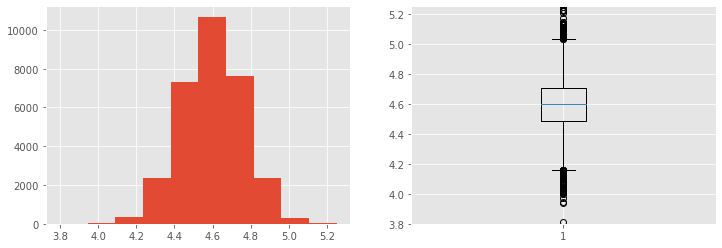

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(doc_freq.values(), range=(3.8, 5.25))

axs[1].boxplot(doc_freq.values())
axs[1].set_ylim((3.8, 5.25))

plt.show(fig)

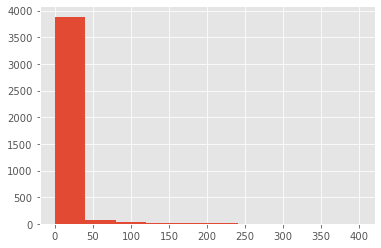

In [25]:
fandom_counter = Counter(chain.from_iterable(fandoms))
plt.hist(fandom_counter.values(), range=(0, 400))
plt.show()

In [26]:
print('Top 10 Fandom community')
sorted(fandom_counter.items(), key=lambda x:-x[1])[:10]

Top 10 Fandom community


[('僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia', 1470),
 ('Video Blogging RPF', 1337),
 ('Minecraft (Video Game)', 1297),
 ('Harry Potter - J. K. Rowling', 1051),
 ('Marvel Cinematic Universe', 1033),
 ('Haikyuu!!', 977),
 ('방탄소년단 | Bangtan Boys | BTS', 942),
 ('原神 | Genshin Impact (Video Game)', 749),
 ('NCT (Band)', 513),
 ('Star Wars - All Media Types', 513)]

In [27]:
labels, count = zip(*[(key, count) for key, count in fandom_counter.items() if count > 50])
print(f'{len(labels) * 100 / len(fandom_counter):.2f}% fandom communities account for {sum(count) * 100 / len(df):.2f}% of fanfictions.')

3.26% fandom communities account for 84.38% of fanfictions.


The above is a rough estimate, because one fanfic can belong to multiple fandoms. Let's compute the average freq of each fandom

In [29]:
fandom_freq = {key: [] for key, count in fandom_counter.items() if count > 50}
for doc_id, ave_freq in doc_freq.items():
    for f in fandoms[doc_id]:
        if f in fandom_freq:
            fandom_freq[f].append(ave_freq)
fandom_freq = {key: sum(freq_list) / len(freq_list) for key, freq_list in fandom_freq.items()}

In [30]:
print('Top 20 fandoms using rare words')
for fandom, ave_freq in sorted(fandom_freq.items(), key=lambda x:x[1])[:20]:
    print(fandom, fandom_counter[fandom], round(ave_freq, 3))

print('\nTop 20 fandoms using common words')
for fandom, ave_freq in sorted(fandom_freq.items(), key=lambda x:-x[1])[:20]:
    print(fandom, fandom_counter[fandom], round(ave_freq, 3))

Top 20 fandoms using rare words
The Terror (TV 2018) 53 4.43
Final Fantasy XIV 78 4.455
The Silmarillion and other histories of Middle-Earth - J. R. R. Tolkien 62 4.459
Dragon Age: Inquisition 80 4.486
Dragon Age (Video Games) 79 4.491
Hades (Video Game 2018) 70 4.502
Dragon Age - All Media Types 55 4.511
天官赐福 - 墨香铜臭 | Tiān Guān Cì Fú - Mòxiāng Tóngxiù 54 4.511
Compilation of Final Fantasy VII 76 4.512
山河令 | Word of Honor (TV 2021) 65 4.518
Hannibal (TV) 83 4.52
The Witcher (TV) 124 4.526
Good Omens (TV) 140 4.528
Wiedźmin | The Witcher - All Media Types 205 4.53
The Legend of Zelda & Related Fandoms 56 4.531
陈情令 | The Untamed (TV) 318 4.533
魔道祖师 - 墨香铜臭 | Módào Zǔshī - Mòxiāng Tóngxiù 324 4.533
The Mandalorian (TV) 160 4.533
Good Omens - Neil Gaiman & Terry Pratchett 110 4.534
InuYasha - A Feudal Fairy Tale 60 4.535

Top 20 fandoms using common words
9-1-1: Lone Star (TV 2020) 87 4.725
Formula 1 RPF 80 4.704
Shameless (US) 67 4.685
9-1-1 (TV) 147 4.681
Glee 55 4.674
No Fandom 67 4.667


There is not much rare v.s. common word usage difference between fandoms. But fantasy-related fandoms seem to have more rare words, probably becuase of the specific settings used in these fandoms. On the other hand, US TV-related fandoms use more common words, probably because they are set in a more everyday, modern setting.

Let's try adding this score to the current word embedding ranking system?

In [31]:
X = np.load('matrix/X.npy')

In [77]:
R = np.array(list(doc_freq.values())).reshape(-1,1)

Let's choose a fanfic we are interested in

In [75]:
poi1 = 5
print_fanfic(poi1, True, 1000)
print('\nDocument rarity:', doc_freq[poi1])


[5]('30843302', 'On an Oaken Tablet') Explicit
['The Terror (TV 2018)']
https://archiveofourown.org/works/30843302
['Dead Dove: Do Not Eat', 'Mutineer Era (The Terror)', 'Gang Rape', 'Sexual Violence', 'Oral Sex', 'Anal Sex', 'Forced Orgasm', 'Post-Orgasm Torture', 'Public Humiliation', 'Forced Feminization', 'verbal feminization', 'Unreliable Narrator', 'Twisted and Fluffy Feelings', 'Period Typical Attitudes', 'Implied/Referenced Sex Work', 'implied/referenced corporal punishment', 'Plot What Plot/Porn Without Plot', 'Hurt No Comfort', 'Angst']

The doctor's flesh, uncooked pink, writhes naked on the sweat-polished oaken planks laid down as table, altar, plinth. The surface is near mirror-like after the passage across itself of so many suppers, by so many hungry hands, spread. First he yowls and claws at the place against which he's pinned belly-down, incensed into the spluttering of exhortations, hands wide on every scrap of his warm limbs on offer by powers here be and not by him 

This is the ranking without using "rarity" as a metric

In [79]:
from sklearn.metrics.pairwise import cosine_similarity

cs = cosine_similarity(X[poi1].reshape(1,-1), X).flatten()
for doc_id in np.argsort(-cs)[1:6]:
    print_fanfic(doc_id)


[12450]('28311915', 'heaven and back') Explicit
['富豪刑事 Balance:UNLIMITED | Fugou Keiji: Balance:Unlimited (Anime)']
https://archiveofourown.org/works/28311915
['Pre-Slash', 'Pre-Relationship', 'Post-Canon', 'by that i mean the direct scene after e11', 'Resolved Sexual Tension', 'Teasing', 'Frottage', 'light though', 'Lots of kissing', 'Nipple Play', 'Nipple Licking', 'Hand Jobs', 'Anal Fingering', 'Anal Sex', 'Top Kambe Daisuke', 'Bottom Katou Haru', 'Soft Kambe Daisuke', 'Soft Katou Haru', 'Kambe Daisuke Has a Big Dick', 'Creampie', 'just me or does anyone else forget what they wrote right after they finish', 'Blow Jobs', 'Partners to Lovers', 'Dirty Talk', 'ish?', 'Porn with Feelings', 'Explicit Sexual Content', 'Smut', 'Porn', 'it’s p fluffy ngl', 'SO', 'Fluff and Smut', 'Fluff', 'Multiple Orgasms', 'My First Work in This Fandom', 'Plot What Plot/Porn Without Plot']


[5657]('30832025', 'Team Building Exercise') Explicit
['Fate/Grand Order']
https://archiveofourown.org/works/308320

This is the result after adding "rarity" as an additional score besides word embedding similarity.

In [80]:
rs = (1 - abs(R - R[poi1])).flatten()

for doc_id in np.argsort(-(cs+rs*0.5))[1:6]:
    print_fanfic(doc_id)
    print(f'word emb score {cs[doc_id]:.3f}, rarity score {rs[doc_id]:.3f}')


[27217]('30616133', 'the devouring') Explicit
['呪術廻戦 | Jujutsu Kaisen (Manga)']
https://archiveofourown.org/works/30616133
['Voyeurism', 'Extremely Dubious Consent', 'First Time', 'First Time Blow Jobs', 'Anal Sex', 'Anal Gaping', 'Rough Sex', 'Cousin Incest', 'Dead Dove: Do Not Eat', 'Invisible Curse Gangbang']

word emb score 0.972, rarity score 0.986

[1870]('30781790', 'In Wake of Battle') Explicit
['Spartacus Series (TV)']
https://archiveofourown.org/works/30781790
['Porn', 'straight up porn', 'Anal Sex', 'Anal Fingering', 'Oral Fixation', 'Fluff', 'Fluff and Smut', 'Riding', 'Post-Battle Sex', 'two thoroughly enamored warriors']

word emb score 0.961, rarity score 0.999

[5366]('30854090', 'Number 1 in the bucket list') Explicit
['Spider-Gwen (Comics)', 'Daredevil (TV)']
https://archiveofourown.org/works/30854090
['Unhealthy Relationships', 'Desperation', 'Non-Consensual', 'Dark', 'Hand Jobs', 'Blow Jobs', 'Mild Painplay', 'blood mention', 'Emotional/Psychological Abuse', 'Menti

I think the results are getting a bit better (the first one does match the target fanfic pretty well). Let's try another fanfic

In [84]:
poi2 = 0
print_fanfic(poi2, True, 1000)
print('\nDocument rarity:', doc_freq[poi2])


[0]('30843428', 'nervous by nature and overthinking everything') Teen And Up Audiences
['Minecraft (Video Game)', 'Dream SMP - Fandom', 'Video Blogging RPF']
https://archiveofourown.org/works/30843428
['Angst', 'Angst with a Happy Ending', 'Kinda', 'Arguing', 'Fighting', 'Traumatized TommyInnit (Video Blogging RPF)', 'Resurrected TommyInnit (Video Blogging RPF)', 'Protective TommyInnit (Video Blogging RPF)', 'Ranboo Has Anxiety Disorder (Video Blogging RPF)', 'Ranboo & TommyInnit Friendship (Video Blogging RPF)', 'Ranboo Has a Tail (Video Blogging RPF)', 'Sad Ranboo (Video Blogging RPF)', 'Nonbinary Ranboo (Video Blogging RPF)', 'Mentioned Toby Smith | Tubbo', 'Platonically Married Ranboo and Toby Smith | Tubbo', 'All Platonic - Freeform', 'you fuckers', 'Unhealthy Coping Mechanisms', 'Canon Compliant']


It was calm, that night in the tower. The kind of calm that came after a day of uneventful happenings, a feeling of peace that grew the longer into the evening it went. On the SMP, d

In [85]:
cs = cosine_similarity(X[poi2].reshape(1,-1), X).flatten()
for doc_id in np.argsort(-cs)[1:6]:
    print_fanfic(doc_id)


[24008]('30438330', 'Gymnastics is more fun when your brothers do it with you') General Audiences
['Minecraft (Video Game)', 'Video Blogging RPF']
https://archiveofourown.org/works/30438330
['TommyInnit-centric (Video Blogging RPF)', 'Clay | Dream-centric (Video Blogging RPF)', 'Jschlatt-centric (Video Blogging RPF)', 'Gymnist TommyInnit', 'Acrobat TommyInnit', 'Digital Artist Jschlatt', 'Traucer Dream', 'Parkourist Dream', 'Older Sibling Jschlatt (Video Blogging RPF)', 'Older Sibling Clay | Dream (Video Blogging RPF)', 'Younger Sibling TommyInnit (Video Blogging RPF)', 'Soft Jschlatt (Video Blogging RPF)', 'Soft Clay | Dream (Video Blogging RPF)', 'Soft TommyInnit (Video Blogging RPF)', 'Protective Jschlatt (Video Blogging RPF)', 'Protective Clay | Dream (Video Blogging RPF)', 'Protective TommyInnit (Video Blogging RPF)', 'kind of', 'Good Older Sibling JSchlatt', 'Good Older sibling Dream', 'Good Jschlatt (Video Blogging RPF)', 'Good dream', 'Past Child Abuse', 'Implied/Referenced Ch

In [86]:
rs = (1 - abs(R - R[poi2])).flatten()
for doc_id in np.argsort(-(cs+rs*5))[1:6]:
    print_fanfic(doc_id)
    print(f'word emb score {cs[doc_id]:.3f}, rarity score {rs[doc_id]:.3f}')


[9413]('30409830', "I'm home...") General Audiences
['NCT (Band)']
https://archiveofourown.org/works/30409830
['End of the World', 'Delusions', 'Romantic Friendship', "It's all about the YEARNING", 'AU Millennium Bug is real', "AKA there's a technology blackout that makes the world topple", 'Fluff', 'Light Angst']

word emb score 0.976, rarity score 0.999

[2723]('30763013', 'pomegranate tea and dreams') General Audiences
["ジョジョの奇妙な冒険 | JoJo no Kimyou na Bouken | JoJo's Bizarre Adventure"]
https://archiveofourown.org/works/30763013
['Domestic Fluff', 'Fluff', 'Light Angst', 'Post-Canon', 'Alternate Universe - Everyone Lives/Nobody Dies', 'Hurt/Comfort', 'Emotional Hurt/Comfort', 'Baking', 'the others are also there', "But they don't have a big enough role to be tagged", 'Past Character Death', 'Birthday Fluff', 'Fluff and Humor', 'I tried at least', 'No Beta', 'Parental Bruno Buccellati']

word emb score 0.969, rarity score 0.999

[8447]('30709211', "The Moon's Lullaby") Teen And Up A